In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

In [232]:
start_time = time.time()

In [233]:
df = pd.read_csv('./water_usage.csv')
df.drop(['unit'], axis=1, inplace=True)
df.head()
A = np.sum(df['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])/365 ### calculate the average daily electricity consumption


In [234]:
elec = eval("""[3933.683204
3577.119783
3566.349395
3335.213361
3299.099057
3468.3302
3401.3622
3840.8015
3614.9732
3581.9664
3591.23499
3481.2981
3179.3055
3180.7328
3577.755
3707.779
3638.8383
3603.821
3466.0974
3155.0505
2729.5634]""".replace('\n', ', '))

waterG = eval("""[19205972
15789278
12528080
9947324
10551848
11843066
11984066
13053619
14510100
14713748
15623871
14747787
11365805
11211927
11907776
12231654
13506530
12181562
11563633
11774078
8173542]""".replace('\n', ', '))

levelG = eval("""[3665.32
3637.85
3607.89
3579.88
3585.86
3600.83
3602.38
3612.42
3626.56
3628.63
3635.90 
3628.87
3595.83
3593.79
3610.47
3604.74
3616.94
3604.11
3596.95
3600.11
3557.57]""".replace('\n', ', '))

waterH = eval("""[20935774
18037362
16037336
14541211
15381733
14530987
13137092
12464762
11489247
10759249
12077029
13798396
12705639
10940605
10071257
9784790
10267537
10144058
10469995
10758113
9532500]""".replace('\n', ', '))

levelH = eval("""[1185.78
1163.17
1145.93
1131.76
1139.87
1131.66
1118
1109.64
1099.72
1091.56
1106.12
1121.91
1110.9
1090.76
1080.68
1077.22
1083.06
1081.57
1085.46
1088.78
1074.01]""".replace('\n', ', '))

elec = np.array(elec)
elec = elec / 1e2

def water_convert(water):
    water = np.array(water)
    water = water * 325846.885 / 1e9
    return water

waterG = water_convert(waterG)
print(waterG)

waterH = water_convert(waterH)
print(waterH)

[6258.2061496  5144.8870527  4082.23584303 3241.30453949 3438.28680179
 3859.02616495 3904.97057573 4253.48108913 4728.07088604 4794.42895247
 5090.98969699 4805.52045459 3703.51215477 3653.3714878  3880.11171688
 3985.6463543  4401.06072766 3969.32403213 3767.97379233 3836.54664005
 2663.32320012]
[6821.85674296 5877.41822132 5225.7159793  4738.20830848 5012.08978395
 4734.87684993 4280.68050616 4061.60386997 3743.73534595 3505.86777159
 3935.2622797  4496.1643546  4140.09289008 3564.96205927 3281.68772148
 3188.34334188 3345.64494807 3305.40970056 3411.61525672 3505.49760953
 3106.13543126]


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_72339/2169521912.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  modelG.fit(df['waterG'][:,np.newaxis], df['elec'][:,np.newaxis])
/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_72339/2169521912.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  modelH.fit(df['waterH'][:,np.newaxis], df['elec'][:,np.newaxis])


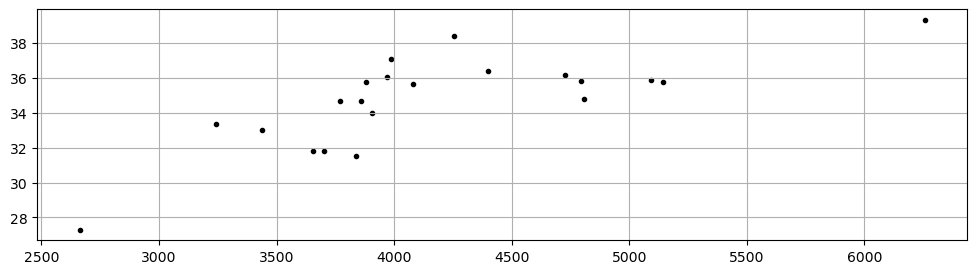

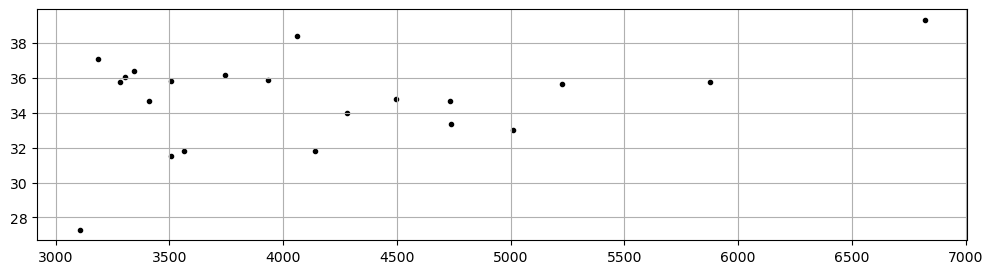

In [235]:
df = pd.DataFrame(elec, columns=['elec'])
df['waterG'] = waterG
df['waterH'] = waterH
fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterG'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
modelG = linear_model.LinearRegression()
modelG.fit(df['waterG'][:,np.newaxis], df['elec'][:,np.newaxis])

fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterH'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
modelH = linear_model.LinearRegression()
modelH.fit(df['waterH'][:,np.newaxis], df['elec'][:,np.newaxis])

plt.show()

In [236]:
print("Fitting for dam G")
print("---------------------")
print('slope: %.4f' % modelG.coef_[0])
print('intercept: %.4f' % modelG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %
      (modelG.coef_[0], modelG.intercept_))

print("Fitting for dam H")
print("---------------------")
print('slope: %.4f' % modelH.coef_[0])
print('intercept: %.4f' % modelH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %
      (modelH.coef_[0], modelH.intercept_))


Fitting for dam G
---------------------
slope: 0.0025
intercept: 24.1174
The linear regression function: y = 0.0025x + 24.1174
Fitting for dam H
---------------------
slope: 0.0009
intercept: 31.0267
The linear regression function: y = 0.0009x + 31.0267


In [237]:
### here mu is the slope
mu_G = modelG.coef_[0]
### here mu is the slope
mu_H = modelH.coef_[0]

/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_72339/2274953697.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])


LinearRegression()

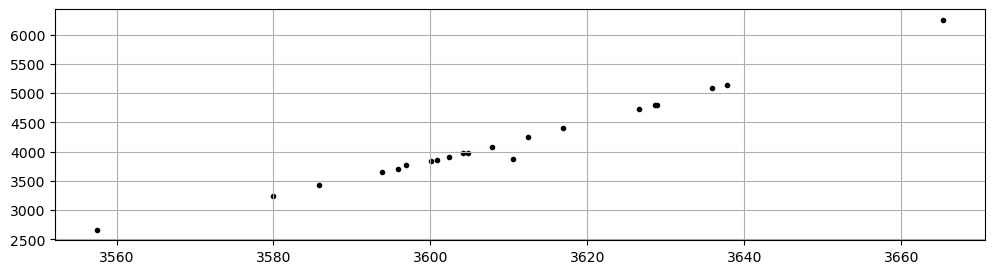

In [238]:
# water = a * level + b
df2 = pd.DataFrame(levelG, columns=['levelG'])
df2['waterG'] = waterG
fig = plt.figure(figsize =(12,3))
plt.scatter(df2['levelG'],df2['waterG'],marker = '.',color = 'k')
plt.grid(True)

levelG2waterG = linear_model.LinearRegression()
levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])

In [239]:
print('slope: %.4f' % levelG2waterG.coef_[0])
print('intercept: %.4f' % levelG2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

slope: 33.2906
intercept: -115987.1261
The linear regression function: y = 33.2906x + -115987.1261


In [240]:
print('The transformation from level to water volumn for dam G is: volume = %.4f * level + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

The transformation from level to water volumn for dam G is: volume = 33.2906 * level + -115987.1261


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_72339/3986053116.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelH2waterH.fit(df2['levelH'][:,np.newaxis], df2['waterH'][:,np.newaxis])


LinearRegression()

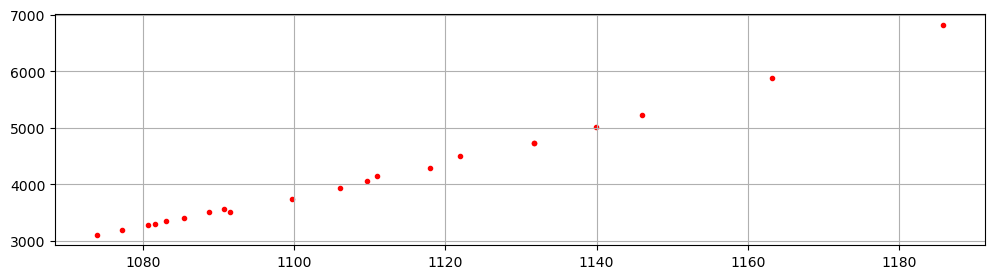

In [241]:
# water = a * level + b
df2 = pd.DataFrame(levelH, columns=['levelH'])
df2['waterH'] = waterH
fig = plt.figure(figsize =(12,3))
plt.scatter(df2['levelH'],df2['waterH'],marker = '.',color = 'r')
plt.grid(True)

levelH2waterH = linear_model.LinearRegression()
levelH2waterH.fit(df2['levelH'][:,np.newaxis], df2['waterH'][:,np.newaxis])

In [242]:
print('slope: %.4f' % levelH2waterH.coef_[0])
print('intercept: %.4f' % levelH2waterH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

slope: 31.7852
intercept: -31136.6688
The linear regression function: y = 31.7852x + -31136.6688


In [243]:
print('The transformation from level to water volumn for dam H is: volume = %.4f * level + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

The transformation from level to water volumn for dam H is: volume = 31.7852 * level + -31136.6688


$\mathrm{H}$ 坝水位为 $\mathrm{M}, \mathrm{G}$ 坝水位是 $\mathrm{P}$，对应的水量分别为 $\mathrm{M}_v, \mathrm{P}_v$ 。假设 $\mathrm{H}$ 坝中的 $\lambda$ 比例出水会进入 $\mathrm{G}$ 坝, $\mathrm{H}$ 坝出水速率为 $x$ ， $\mathrm{G}$ 坝出水速率为 $y$. 所有单位时间水需求量是 $A=a_1+a_2+a_3+a_4+a_5$, 单位时间电需求量是 $B=b_1+b_2+b_3+b_4+b_5$, 两个大坝的最低水量之和为 $K$, 分别为 $M_{\min v}, P_{\min v}$ ，提供电力和水量关系系数分别是 $\mu_1, \mu_2$. 两个大坝的最长持续时间是 $T$ 那么满足以下公式:
已知数据: $M, P, A, B, \mu, \lambda$ 要求: $x, y, T$
- $M_v - x * T=M_{\min v}$
- $P_v + \lambda * x * T-y * T=P_{\min v}$
- $A=y+(1-\lambda) * x$
- $B=\mu_1 * M_{\min v} + \mu_2 * P_{\min v}$
- 
解为:
$$
\begin{aligned}
& x=\frac{M_v}{P_v + M_v} * A \\
& y=\frac{P_v+\lambda * M_v}{P_v + M_v } * A \\
& T=\frac{P_v + M_v - M_{\min v} - P_{\min v}}{A}
\end{aligned}
$$

In [244]:
print("Assume M and P is 3557.57 and 1074.01, respectively (2021 data)")
M, P =3557.57, 1074.01
print("All the pre-known parameters known from data are:")
print("------------------------------------------------")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh per day")
print("lambda = ", lamb)
print("mu_1 = ", mu_H)
print("mu_2 = ", mu_G)
print()
print("The further calculated parameters are:")
print("------------------------------------------------")
print('M_v is : volume = %.4f * level + %.4f = %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_, levelG2waterG.coef_[0]*M + levelG2waterG.intercept_))
M_v = levelG2waterG.coef_[0]*M + levelG2waterG.intercept_
print('P_v is : volume = %.4f * level + %.4f = %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_, levelH2waterH.coef_[0]*P + levelH2waterH.intercept_))
P_v = levelH2waterH.coef_[0]*P + levelH2waterH.intercept_
print("Assume M_v / P_v = M_min v / P_min v = {}".format(M_v.squeeze()/P_v.squeeze()))
ratio = M_v.squeeze()/P_v.squeeze()
print("P_min v is %.4f" %(B/(ratio * mu_H + mu_G)))
print("M_min v is %.4f" %(B/(ratio * mu_H + mu_G) * ratio))
M_min, P_min = B/(ratio * mu_H + mu_G) * ratio, B/(ratio * mu_H + mu_G)
print()
print("The final result is:")
print("------------------------------------------------")
print("x = %.4f" %(M_v.squeeze() / (M_v.squeeze() + P_v.squeeze()) * A))
x = M_v.squeeze() / (M_v.squeeze() + P_v.squeeze()) * A
print("y = %.4f" %((P_v.squeeze() + lamb * M_v.squeeze())  / (M_v.squeeze() + P_v.squeeze()) * A))
y = (P_v.squeeze() + lamb * M_v.squeeze())  / (M_v.squeeze() + P_v.squeeze()) * A
print("T = %.4f" %((P_v.squeeze() + M_v.squeeze() - M_min - P_min)/A))
T = (P_v.squeeze() + M_v.squeeze() - M_min - P_min)/A


Assume M and P is 3557.57 and 1074.01, respectively (2021 data)
All the pre-known parameters known from data are:
------------------------------------------------
A =  44.26947 with the unit of billion gallons per day
B =  3.26302012230137 with the unit of billion kwh per day
lambda =  0.1
mu_1 =  [0.00089069]
mu_2 =  [0.00254783]

The further calculated parameters are:
------------------------------------------------
M_v is : volume = 33.2906 * level + -115987.1261 = 2446.5517
P_v is : volume = 31.7852 * level + -31136.6688 = 3000.9357
Assume M_v / P_v = M_min v / P_min v = 0.8152629718941737
P_min v is 996.6516
M_min v is 812.5332

The final result is:
------------------------------------------------
x = 19.8821
y = 26.3756
T = 82.1854


In [245]:
end_time = time.time()
print("The total time is: %.4f seconds" %(end_time - start_time))

The total time is: 1.2181 seconds
